<a href="https://colab.research.google.com/github/sushilksing808/EDA_1st-capstone-project/blob/main/Play_Store_App_Review_Analysis_Team_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

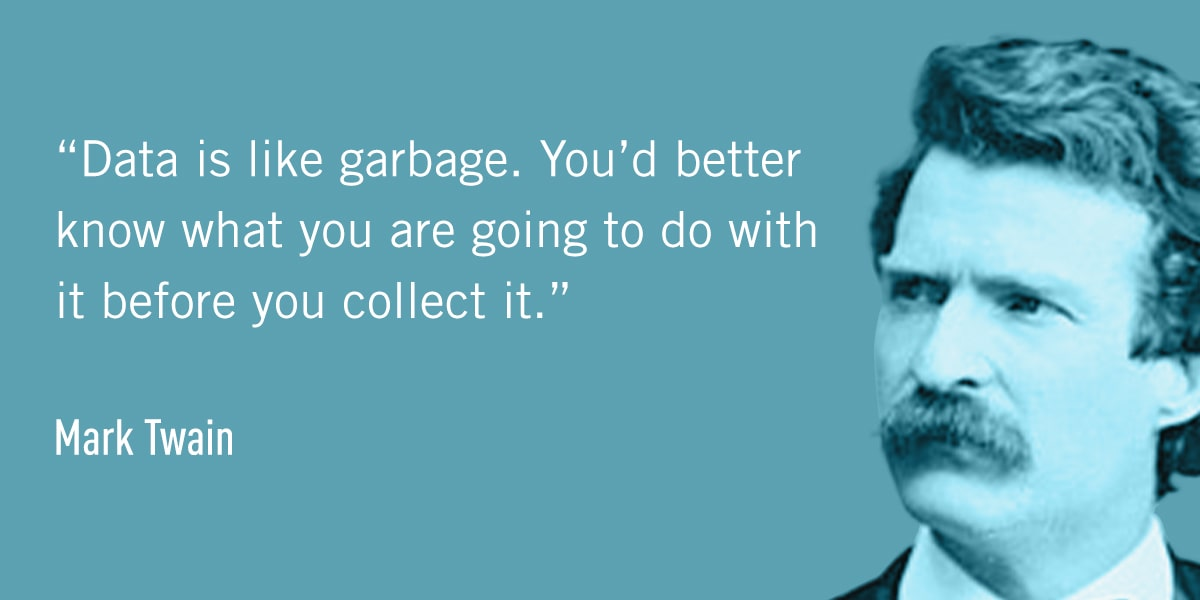

Since the reign of digital revolution, we are more connected to internet. In the fast changing economy, business, organisations, jobs, and most of the work is transformed online. we can demand almost anything with single click.
* Hungry? Grab a pizza from Zomato, Swiggy, etc. Provides fast delivery, safe and hygenic with maintaining qaulity standards.
* want lifestyle wears, Groceries, Electronics, almost anything you wish ? Amazon is there..
* Trip to Goa with 3 idiots or 3 musketiers ? Go ibibo is there.

**Let's take a look at the data, which consists of two files:**

**playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.
**user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
Before jumping into the data's provided, let me first explain you about the EDA analysis.

**What is Exploratory Data Analysis?**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

**The following are the various steps involved in the EDA process:**

**Problem Statement**- We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.

**Hypothesis** - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.

**Univariate Analysis** - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.

**Bivariate Analysis** - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.

**Multivariate Analysis** - This is done when more than two variables have to be analyzed simultaneously.

**Data Cleaning** - We shall clean the dataset and handle the missing data, outliers and categorical variables.

**Testing Hypothesis** - We shall check if our data meets the assumptions required by most of the multivariate techniques.

**Exploring playstore data**

In [ ]:
# importing libraries
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
#loading the data set
data='/content/drive/MyDrive/almabetter 1st capstone project/Play Store Data.csv'

In [ ]:
review='/content/drive/MyDrive/almabetter 1st capstone project/User Reviews.csv'

In [ ]:
df_data=pd.read_csv(data)
df_review=pd.read_csv(review)

**lets see some insights of the data**

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Now, we deep dive into data contents of both **data frames**

In [ ]:
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_data.shape

(10841, 13)

**lets take a look on all categories**

In [ ]:
# Category
cat = df_data.Category.unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

So we got 34 categories on this data set. Lets see which one is the most famous

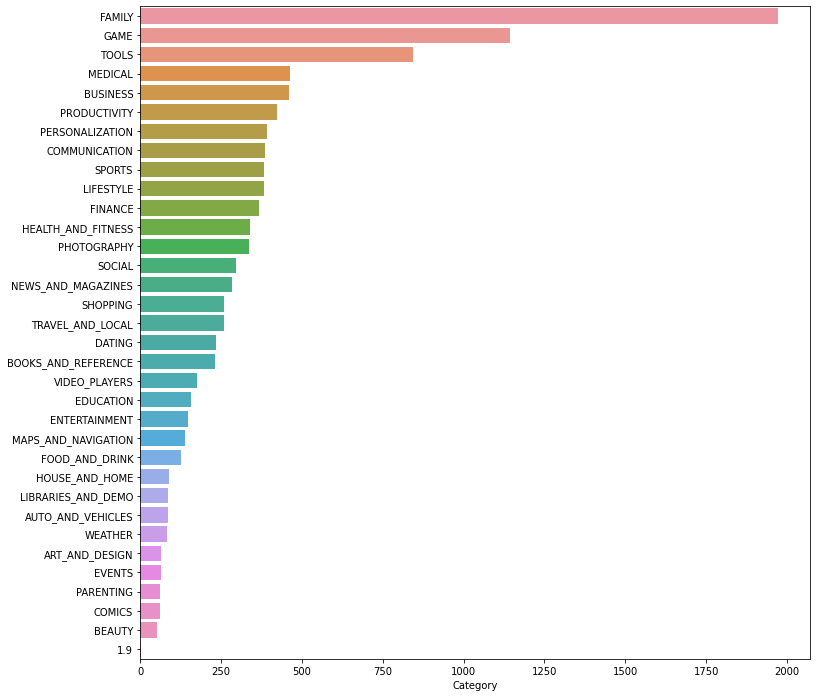

In [ ]:
#Most used category
plt.figure(figsize=(12,12))
most_cat = df_data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df_data)

So, there is around 2000 app with family category, followed by game category with 1200 app. And this ‘1.9’ Category, i don’t know what it is, but it only had 1 app so far, so its not visible on the graph.

Let’s look at the rating, and what kind of correlation share between category and rating.

In [ ]:
#unique values
df_data.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There we had a null values, I am going to leave it as it is. And a 19 for rating is not possible, so i assume it’s a ‘1.9’. So let’s change it and see the distribution value on rating column.

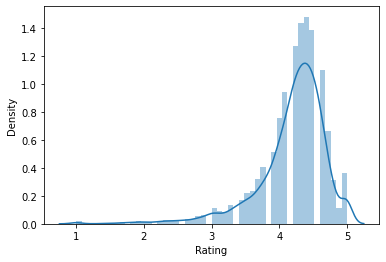

In [ ]:
df_data['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
sns.distplot(df_data.Rating)

Most of the rating is around 4. Let’s see how rating is distributed by category column.

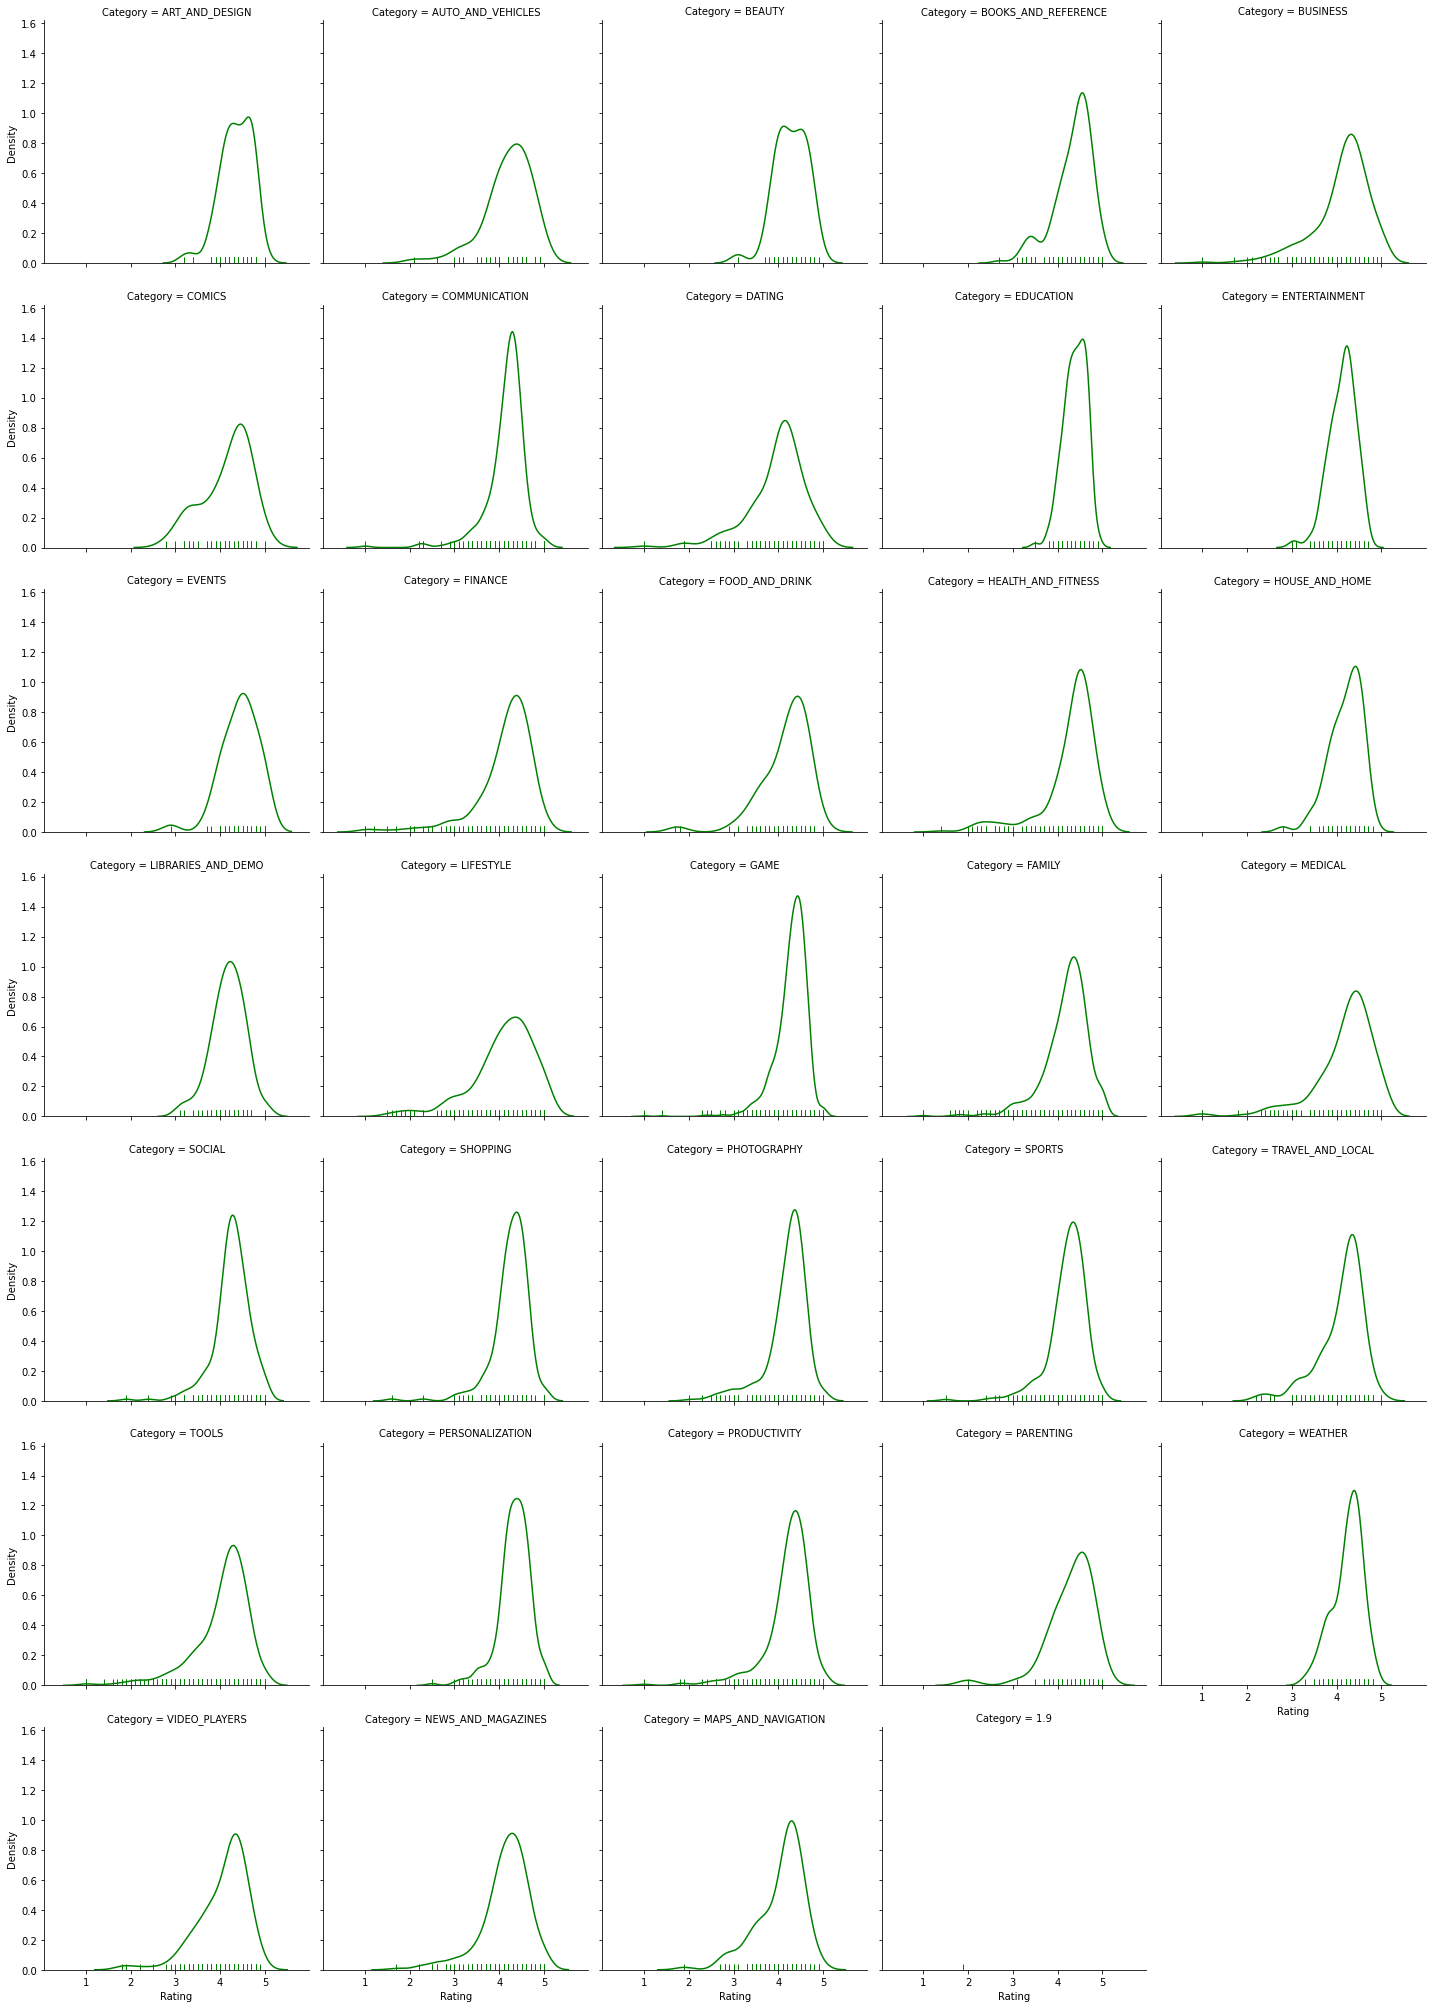

In [ ]:
g = sns.FacetGrid(df_data, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="g"))

 Cleaning Data - Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make analysis easy.

In [ ]:
#rating
df_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

 ratings have the highest 1474 null values, and other columns such as type, content rating and android ver have few null values.

In [ ]:
# We see spaces between two words in some columns names and may throw error in operations so we removed it  
df_data.columns=df_data.columns.str.replace(' ','')

In [ ]:
df_data['ContentRating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64

In [ ]:
# There is only one Nan value in ContentRating so we replace with 'Everyone'
df_data.ContentRating.fillna(value='Everyone',inplace=True)

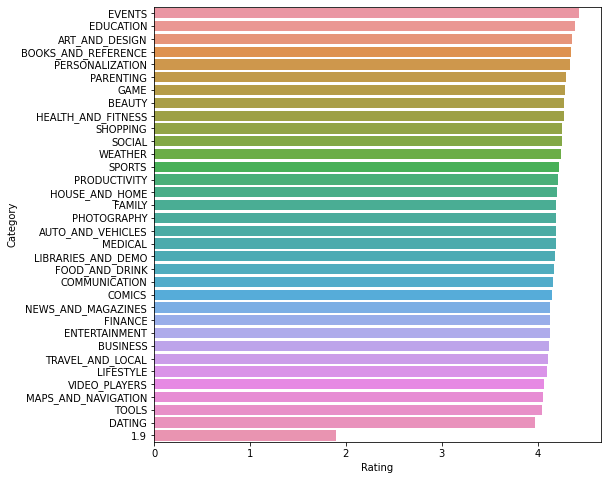

In [ ]:
# Mean Rating
plt.figure(figsize=(8,8))
mean_rat = df_data.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=df_data)

In [ ]:
df_data['Rating'].mean()

4.191512757553112

And this is the average of rating by category, family and game has a lot of quantity causing the low on average rating, on the other side event has the highest average rating by category.

In [ ]:
#replace nan values in Rating with mean rating value to avoid operational errors
df_data.Rating.fillna(value=4.1,inplace=True)

**REVIEWS**


 review sometime can measure the app popularity. The more reviews, the better.

In [ ]:
df_data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [ ]:
# Reviews
df_data.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

# inside review there is a value with 3.0M with M stand for million, lets change it so it can be measure as float

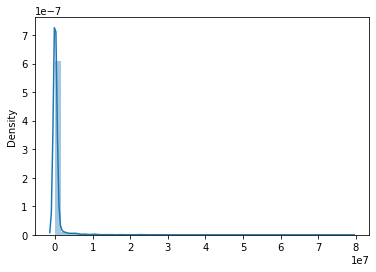

In [ ]:
Reviews = []

for x in df_data.Reviews:
    x = x.replace('M','00')
    Reviews.append(x)

Reviews = list(map(float, Reviews))
df_data['reviews'] = Reviews
sns.distplot(Reviews)

the distribution of total reviews on each app

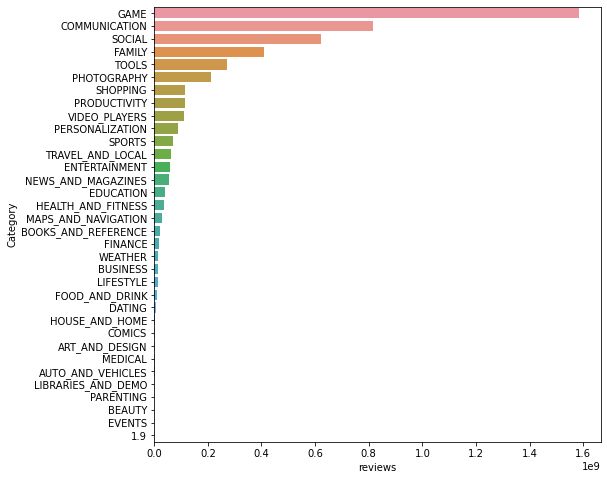

In [ ]:
# Total reviews
plt.figure(figsize=(8,8))
sum_rew = df_data.groupby(['Category'])['reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=df_data)

This graph is showing the total reviews

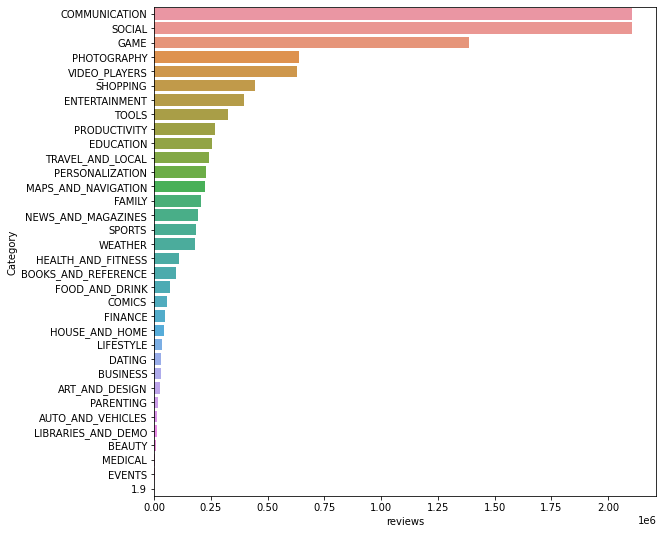

In [ ]:
# Mean reviews
plt.figure(figsize=(9,9))
mean_rew = df_data.groupby(['Category'])['reviews'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rew, y=mean_rew.index, data=df_data)

This is the average of reviews on each category

**INSTALLS**

In [ ]:
#installs
df_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [ ]:
df_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In the installs column we can see that there is '+' sign which should be removed to get correct values for operation. And also data type is object which we will convert to float for analyzing.

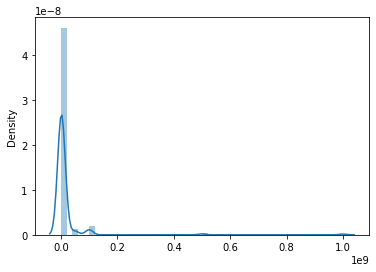

In [ ]:
df_data['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
Installs = []

for x in df_data.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
df_data['installs'] = Installs
sns.distplot(Installs)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10841 non-null  object 
 1   Category       10841 non-null  object 
 2   Rating         10841 non-null  float64
 3   Reviews        10841 non-null  object 
 4   Size           10841 non-null  object 
 5   Installs       10841 non-null  object 
 6   Type           10840 non-null  object 
 7   Price          10841 non-null  object 
 8   ContentRating  10841 non-null  object 
 9   Genres         10841 non-null  object 
 10  LastUpdated    10841 non-null  object 
 11  CurrentVer     10833 non-null  object 
 12  AndroidVer     10838 non-null  object 
 13  reviews        10841 non-null  float64
 14  installs       10841 non-null  float64
dtypes: float64(3), object(12)
memory usage: 1.2+ MB


Finally, most of data cleaning is done. but in the info part we have Last updated, current version, android ver and size which will not use, since it will not affect in analysing data. so we can drop them.

In [ ]:
df_data.drop(labels=['LastUpdated','CurrentVer','AndroidVer'], axis=1,inplace=True)

In [ ]:
df_data.drop(labels=['Size'], axis=1,inplace=True)

In [ ]:
df_data.head()

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,reviews,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,159.0,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,967.0,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,87510.0,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,215644.0,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,967.0,100000.0


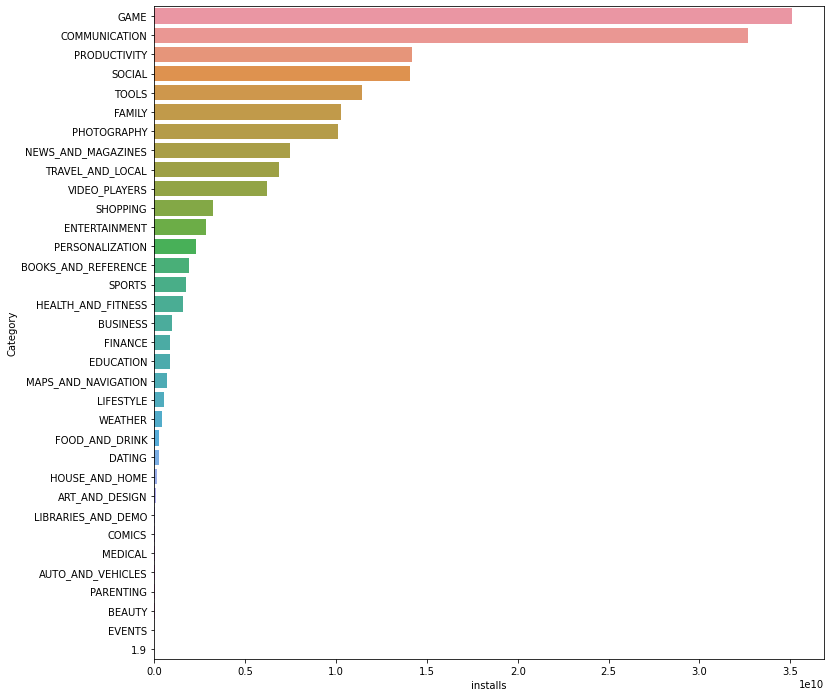

In [ ]:
# Total Installs
plt.figure(figsize=(12,12))
sum_inst = df_data.groupby(['Category'])['installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df_data)

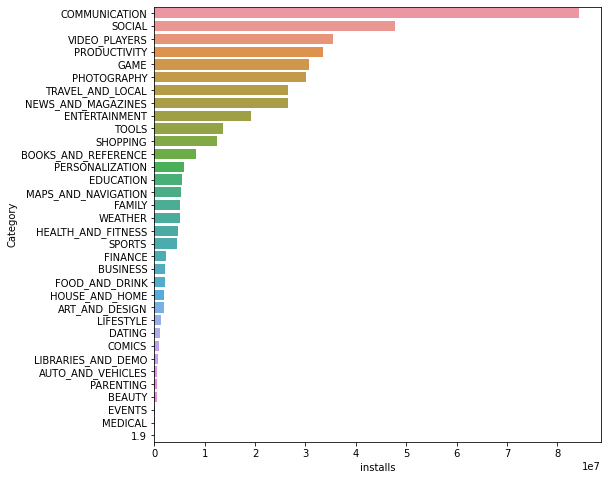

In [ ]:
# Mean Install
plt.figure(figsize=(8,8))
mean_ints = df_data.groupby(['Category'])['installs'].mean().sort_values(ascending=False)
sns.barplot(x=mean_ints, y=mean_ints.index, data=df_data)

**Price**

let's check wether app is free or paid

In [ ]:
# Type for category
df_data.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

There is 0 and null value, let’s change them to free.

In [ ]:
df_data['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
df_data['Type'].fillna('Free', inplace=True)

Category           Type
1.9                Free      1
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 64, dtype: int64


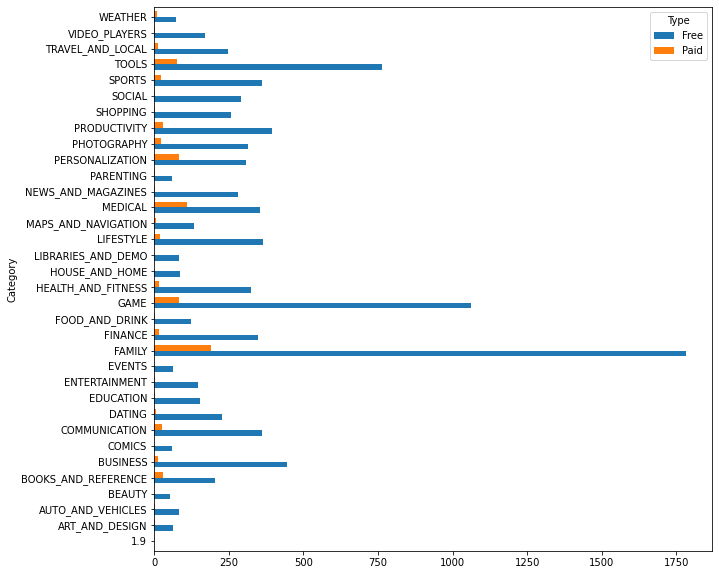

In [ ]:
print(df_data.groupby('Category')['Type'].value_counts())
Type_cat = df_data.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,10), width=0.7)
plt.show()

So again, family category has the most free and paid app on the google play store. We can see social app is always free, like entertainment, event, education, comic, and more.

The medical has a high amount of paid app considering quantity of medical app is not much.

After Cleaning Playstore data now lets dive into User Reviews Data Set

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Here in the User review data, there is reviews by each user for each app is provided in form of Translated review which is comment made by user, sentiment which has polls like positive, negative and neutral, and then there is polarity where values range between -1 to 1 indicating like and dislike value and subjectivity value ranges between 0 to 1 indicating how much user enjoys using app

In [ ]:
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
df_review.shape

(64295, 5)

There are Null values in 4 columns of Data frame, we will keep rows which have all non-null values for analysing data

In [ ]:
df_review.dropna(thresh=5,inplace=True)

In [ ]:
df_review.shape

(37427, 5)

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


**Data visualisation**

what is the ratio of free app vs paid apps in play store?

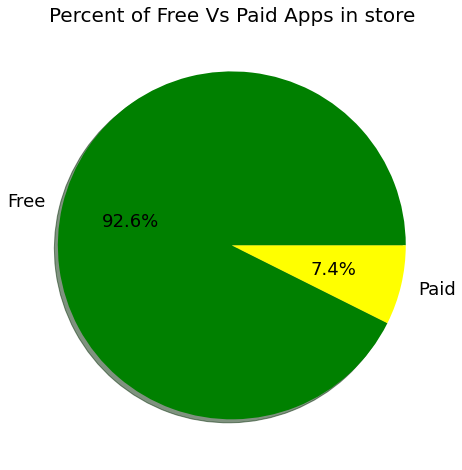

In [ ]:
plt.figure(figsize=(8,8))
labels = df_data['Type'].value_counts(sort = True).index
sizes = df_data['Type'].value_counts(sort = True)
colors = ["green","yellow"]
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,textprops={'fontsize': 18})

plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

The above Pie-Chart represents percentage of Free apps are 92.6% and paid apps are 7.4% in dataset.

Now lets check frequency of ratings distribution through distribution curve

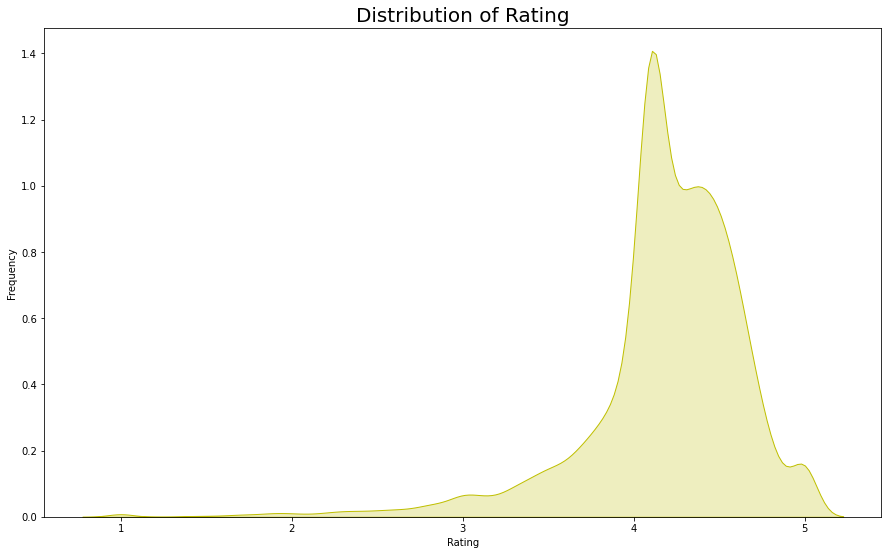

In [ ]:
#code here
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_data.Rating, color="y", shade = True)
plt.title('Distribution of Rating',size = 20);

As a result we find 4.1 has highest frequency and represents overall rating of play store.

**top categories in play store**

In [ ]:
df_data.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: App, dtype: int64

In [ ]:
x = df_data['Category'].value_counts()
y = df_data['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

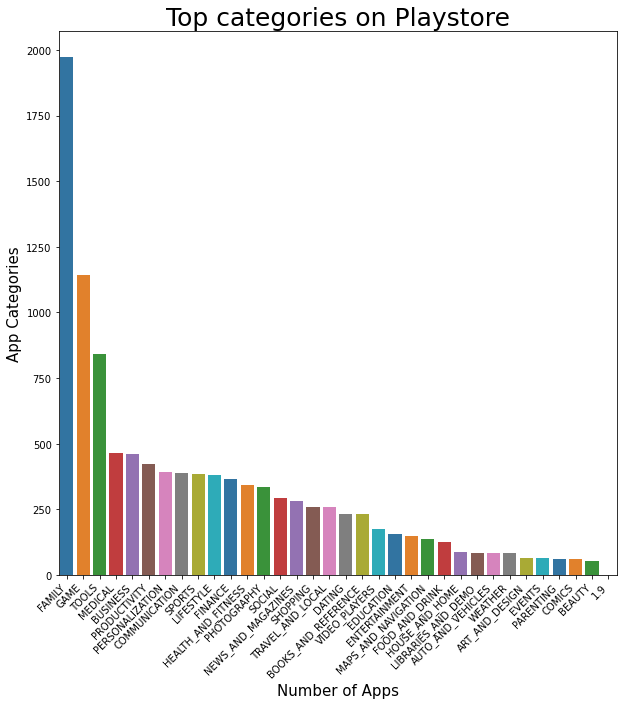

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(10,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

**Findings:**

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category

**Percentage of app share in each category**


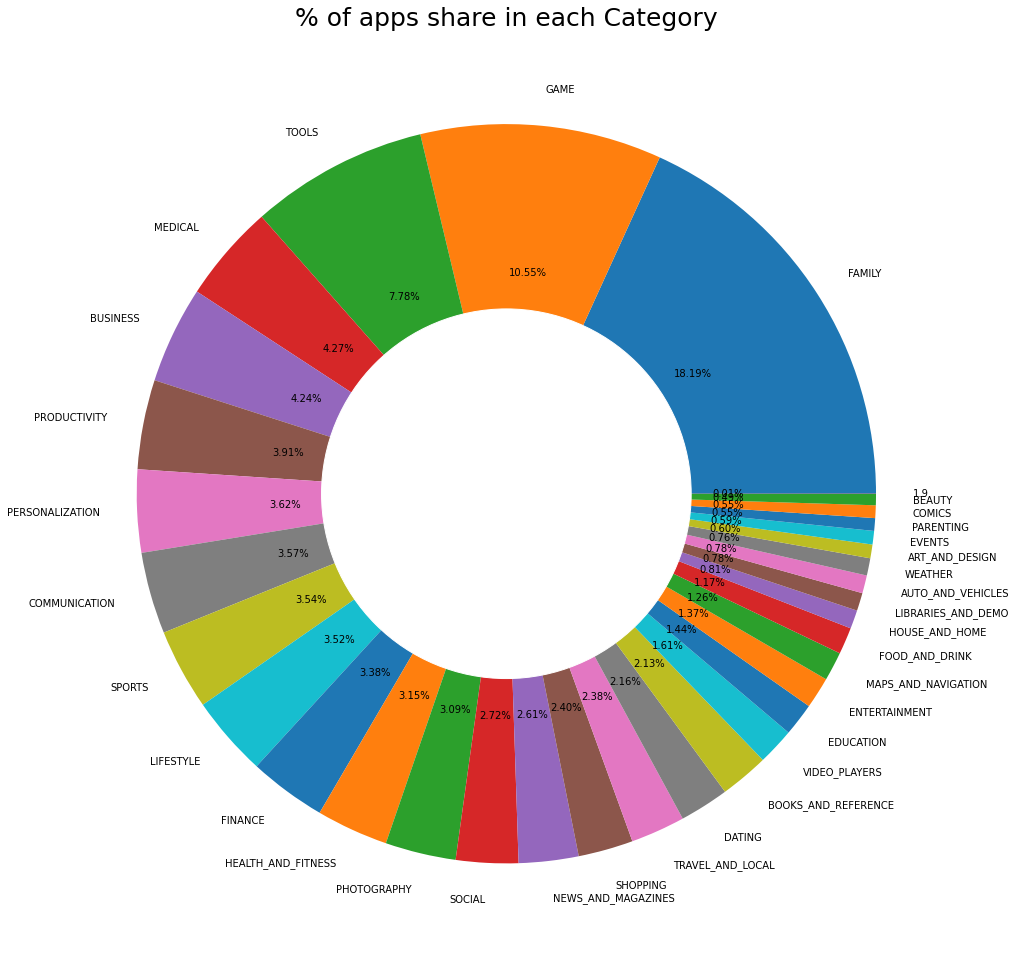

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(17,17))
plt.pie(df_data.Category.value_counts(), labels=df_data.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()


 **Which category App's have most number of installs?**

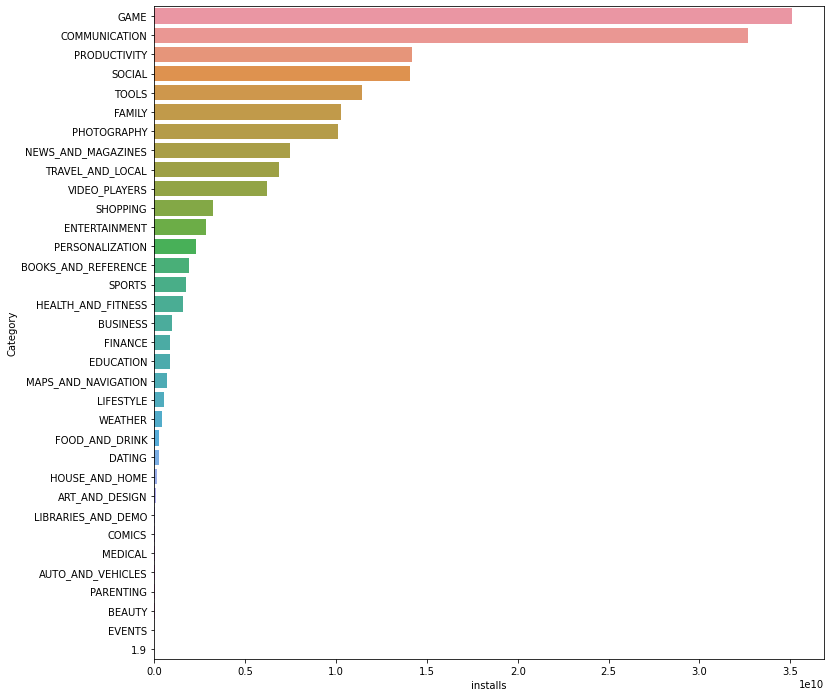

In [ ]:
plt.figure(figsize=(12,12))
sum_inst = df_data.groupby(['Category'])['installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=df_data)

**Findings:**

This tells us the category of apps that has the maximum number of installs. The Game, Communication and Tools categories has the highest number of installs compared to other categories of apps.

 **Average rating of the apps**

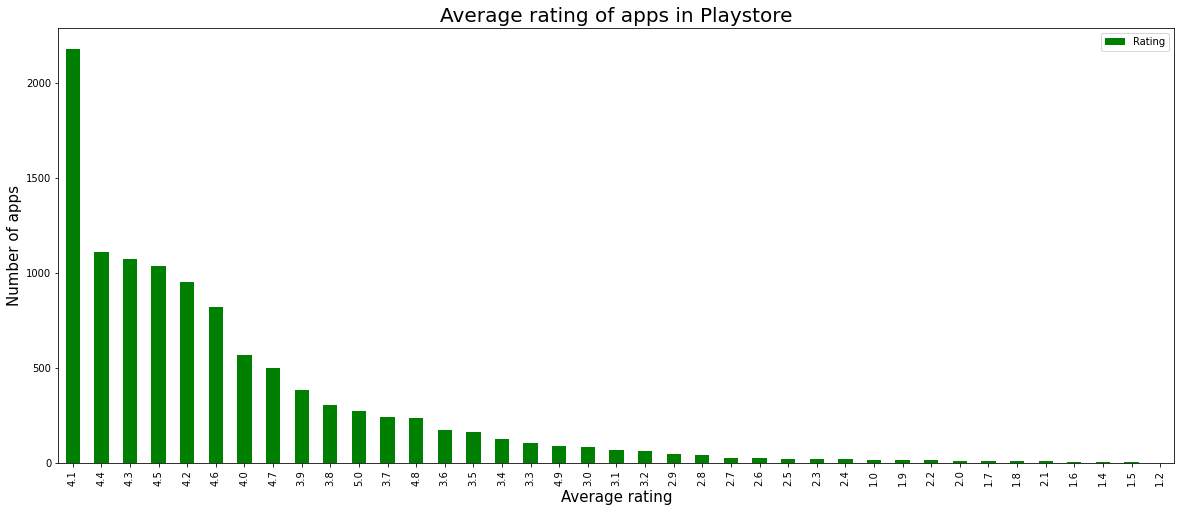

In [ ]:
# Average app ratings

df_data['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'g' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

4-5: Top rated

3-4: Above average

2-3: Average

1-2: Below average

 **What are the Top 10 installed apps in any category?**

In [ ]:

def findtop10incategory(str):
    str = str.upper()
    top10 = df_data[df_data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

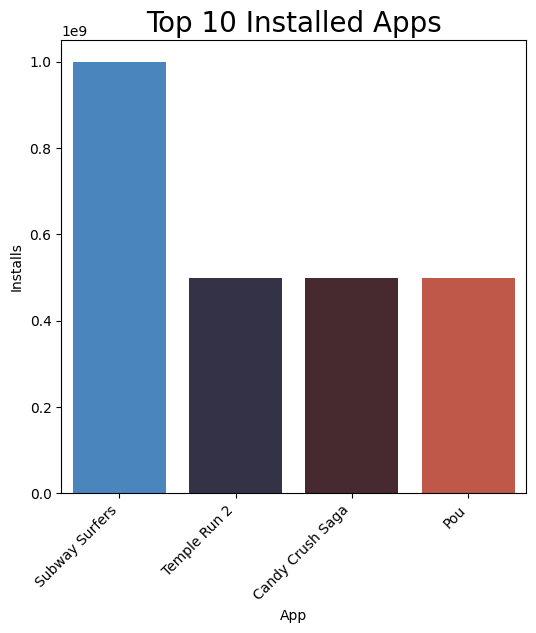

In [ ]:
df_data["Installs"] = df_data['Installs'].str.replace(',|\+',"")
df_data['Installs'] = pd.to_numeric(df_data['Installs'])
findtop10incategory('GAME')

**Findings:**

From the above graph we can see that in the Game category Subway Surfers,Candy Crush Saga, Temple Run 2 has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

 **Top apps that are of free type.**

In [ ]:
 # Creating a df for only free apps
 
 free_df= df_data[df_data['Type'] == 'Free']

In [ ]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,reviews,installs
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1000000000,Free,0,Teen,Books & Reference,1433233.0,1.000000e+09
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,Free,0,Everyone,Communication,56642847.0,1.000000e+09
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0,Everyone,Communication,69119316.0,1.000000e+09
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,Free,0,Everyone,Communication,9642995.0,1.000000e+09
340,Gmail,COMMUNICATION,4.3,4604324,1000000000,Free,0,Everyone,Communication,4604324.0,1.000000e+09
341,Hangouts,COMMUNICATION,4.0,3419249,1000000000,Free,0,Everyone,Communication,3419249.0,1.000000e+09
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0,Everyone,Communication,69119316.0,1.000000e+09
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1000000000,Free,0,Everyone,Communication,56646578.0,1.000000e+09
386,Hangouts,COMMUNICATION,4.0,3419433,1000000000,Free,0,Everyone,Communication,3419433.0,1.000000e+09
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1000000000,Free,0,Everyone,Communication,10484169.0,1.000000e+09


In [ ]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
381                           WhatsApp Messenger
382     Messenger – Text and Video Chat for Free
386                                     Hangouts
391                Skype - free IM & video calls
411                 Google Chrome: Fast & Secure
451                                        Gmail
464                                     Hangouts
468                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
1700                              Subway Surfers
1750                              Subway Surfers
1872                              Subway Surfers
1917                              Subway Surfers
2544                

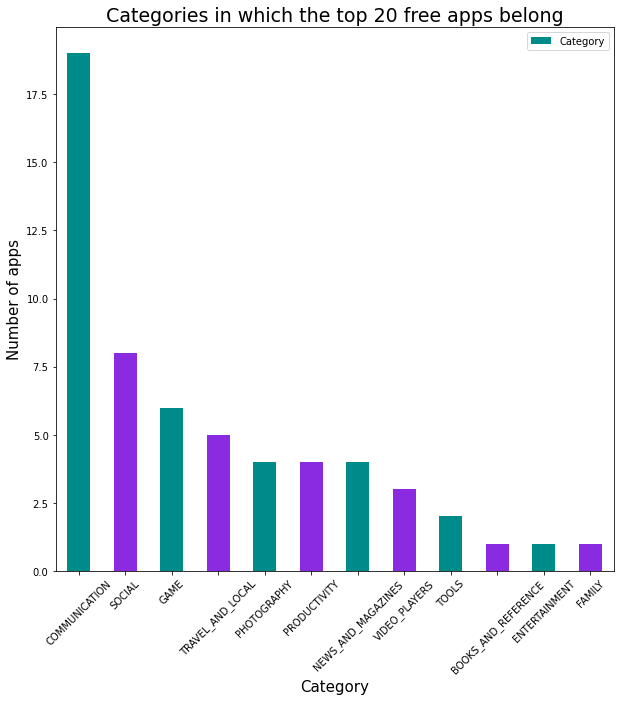

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(10,10), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

**Top apps that are of paid type.**

In [ ]:
# Creating a df containing only paid apps
paid_df=df_data[df_data['Type']=='Paid']

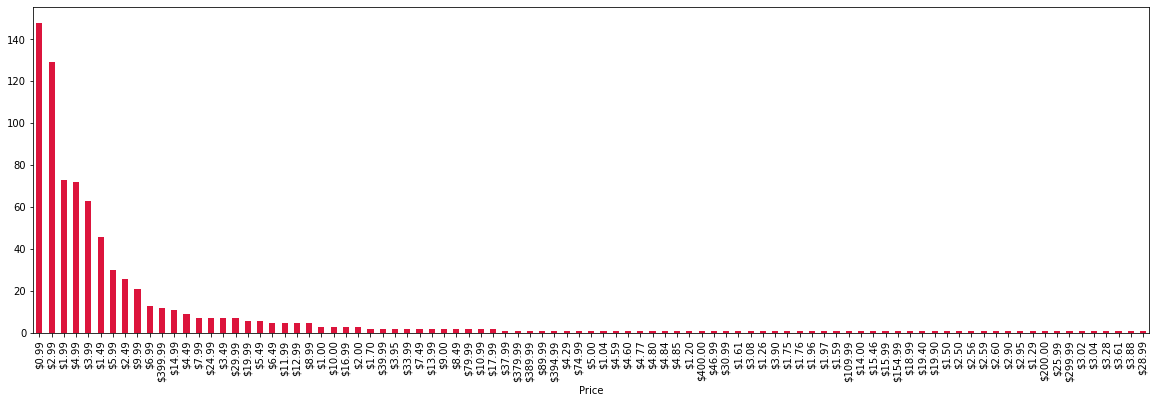

In [ ]:
# Number of apps that can be installed at a particular price 

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)

**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,reviews,installs,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,100000,Paid,$4.99,Everyone,Business,11442.0,100000.0,$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$...
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,100000,Paid,$4.99,Everyone,Business,10295.0,100000.0,$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$...
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,100000,Paid,$4.99,Everyone,Business,11442.0,100000.0,$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$...
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,100000,Paid,$4.99,Everyone,Business,10295.0,100000.0,$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$4.99$...
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,100000,Paid,$3.99,Everyone,Communication,18247.0,100000.0,$3.99$3.99$3.99$3.99$3.99$3.99$3.99$3.99$3.99$...


In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,reviews,installs,Revenue
1838,Star Wars ™: DIRTY,GAME,4.5,38207,100000,Paid,$9.99,Teen,Role Playing,38207.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
6180,Baldur's Gate: Enhanced Edition,FAMILY,4.5,20101,100000,Paid,$9.99,Teen,Role Playing,20101.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
8733,CHRONO TRIGGER (Upgrade Ver.),FAMILY,3.8,11250,100000,Paid,$9.99,Everyone 10+,Role Playing,11250.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
10006,XCOM®: Enemy Within,FAMILY,4.2,13752,100000,Paid,$9.99,Mature 17+,Strategy,13752.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...


In [ ]:
# Top 10 paid apps in the play store
# top10PaidApps = paid_df[paid_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# plt.figure(figsize=(15,15));
# plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
# plt.title('Top10 paid Apps Distribution',size = 20);
# plt.legend(top10PaidApps.App, 
#            loc="lower right",
#            title="Apps",
#            fontsize = "xx-small"
#           );

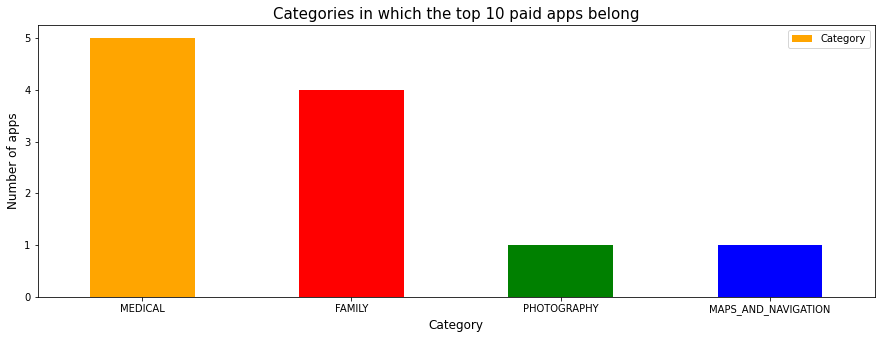

In [ ]:
# Categories in which the top 10 paid apps belong to
top10PaidApps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

From the above graph, we can interpret that the App in medical category has the most paid app belong in the google play store followed by Family, Photography,Maps_and_navigation. 

In [ ]:
# Paid apps with the highest number of installs
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,reviews,installs,Revenue
1838,Star Wars ™: DIRTY,GAME,4.5,38207,100000,Paid,$9.99,Teen,Role Playing,38207.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
6180,Baldur's Gate: Enhanced Edition,FAMILY,4.5,20101,100000,Paid,$9.99,Teen,Role Playing,20101.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
8733,CHRONO TRIGGER (Upgrade Ver.),FAMILY,3.8,11250,100000,Paid,$9.99,Everyone 10+,Role Playing,11250.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...
10006,XCOM®: Enemy Within,FAMILY,4.2,13752,100000,Paid,$9.99,Mature 17+,Strategy,13752.0,100000.0,$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$9.99$...


**Data Visualization on User Reviews:**

**Percentage of Review Sentiments**

In [ ]:
# Basic inspection
df_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

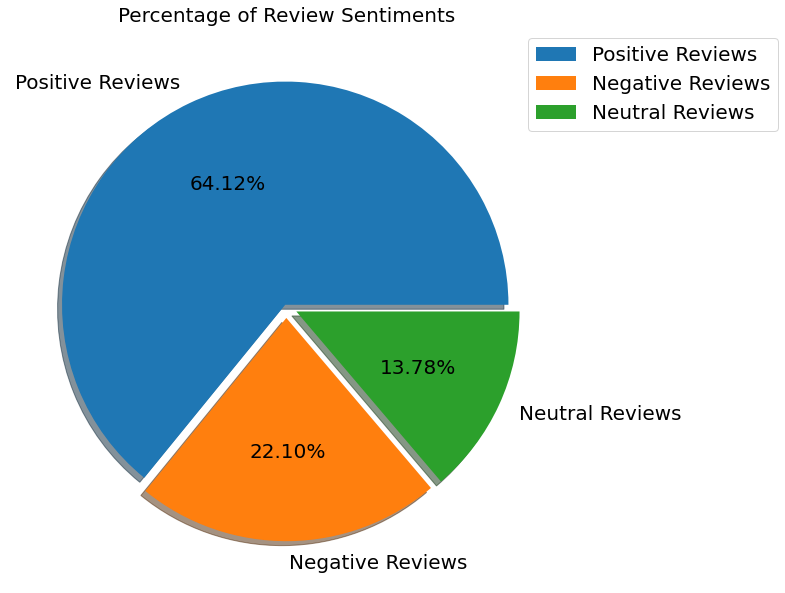

In [ ]:
counts = list(df_review['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

Findings:

Positive reviews are 64.30%
Negative reviews are 22.80%
Neutral reviews are 12.90%

 **Apps with the highest number of positive reviews**

In [ ]:
# positive reviews
positive_ur_df=df_review[df_review['Sentiment']=='Positive']
positive_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


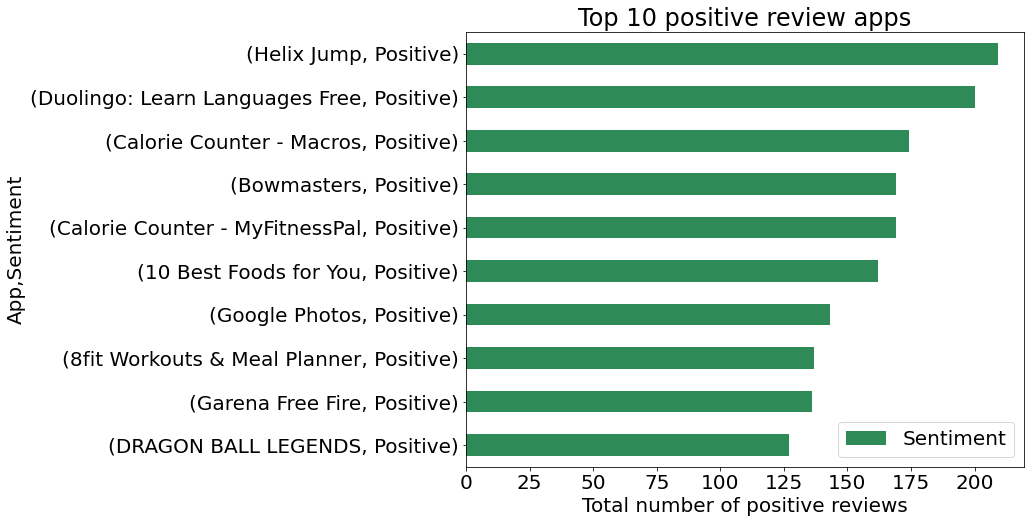

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

**. Apps with the highest number of negative reviews.**

In [ ]:
negative_ur_df=df_review[df_review['Sentiment']=='Negative']
negative_ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


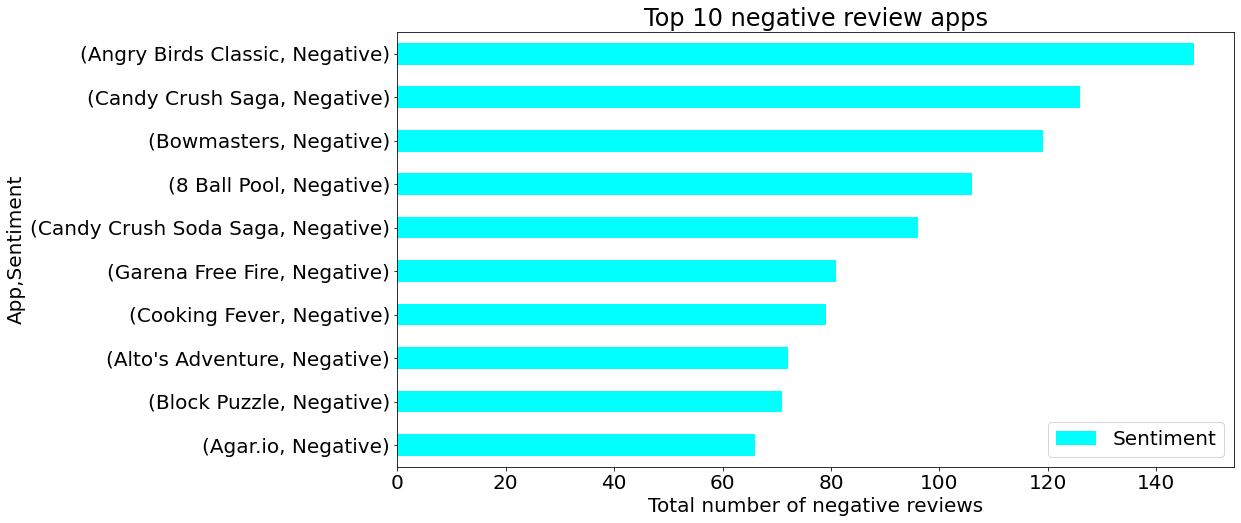

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='cyan').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

**▶Analysis Summary**

In this project of analyzing play store applications, we have worked on several parameters which would help AlmaBetter to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

Percentage of free apps = ~92%

Percentage of apps with no age restrictions = ~82%

Most competitive category: Family

Category with the highest average app installs: Game

Percentage of apps that are top rated = ~80%

Family, Game and Tools are top three categories having 1906, 926 and 829 app count.

Tools, Entertainment, Education, Buisness and Medical are top Genres.
8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.

There are 20 free apps that have been installed over a billion times.
Minecraft is the only app in the paid category with over 10M installs.
This app has also produced the most revenue only from the installation fee.
Category in which the paid apps have the highest average installation fee: Finance

The median size of all apps in the play store is 12 MB.
The apps whose size varies with device has the highest number average app installs.

The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.

Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

**Challenges & Future Work**
Our major challenge was data cleaning.
13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.
The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.
User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.
There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis where we can tell how does these things effect and needs to be kept in mind while developing app for the users.
We can explore the correlation between the size of the app and the version of Android on the number of installs.
Machine learning can help us to deploy more insights by developing models which can help us interpret even more better. We have left this as future work as this is something where we can work on.

**Team Curio monks**

presented by:-

Adil imam

Asadullah pathan

sushil kumar singh

Md sazil sharif

Madhulika kumrai